<a href="https://colab.research.google.com/github/KirpaDmitriy/AIAlgsImplementation/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Многослойный перцептрон

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

In [ ]:
!pip install category-encoders

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from random import choice
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import networkx as nx

## Скачиваю данные

In [ ]:
data = pd.read_csv('agaricus-lepiota.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
X, y = data.drop(columns=[0]), data[0]
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: 0, dtype: object

In [ ]:
y.unique()

array(['p', 'e'], dtype=object)

In [ ]:
encoder = ce.OrdinalEncoder(cols=range(1, 23), return_df=True) 
X = encoder.fit_transform(X)
X

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,...,1,1,1,1,1,1,1,2,2,2
2,2,1,3,1,3,1,1,2,2,1,...,1,1,1,1,1,1,1,2,2,3
3,1,2,3,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,...,1,1,1,1,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,1,1,2,4,2,1,2,11,1,...,1,7,8,1,3,1,1,9,6,7
8120,1,1,1,2,4,2,1,2,11,1,...,1,7,8,1,2,1,1,9,4,7
8121,4,1,1,2,4,2,1,2,2,1,...,1,7,8,1,3,1,1,9,6,7
8122,5,2,1,2,7,1,1,1,9,2,...,4,1,1,1,1,1,2,5,4,7


In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.35)
trainX.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
5931,1,2,1,2,7,1,1,1,9,2,...,1,3,1,1,1,1,2,5,4,5
7712,1,1,3,2,4,1,2,2,3,1,...,4,1,1,1,1,2,1,5,1,2
5977,4,1,7,1,5,1,1,2,5,2,...,2,1,1,1,1,1,1,4,1,2
6389,1,1,5,2,8,1,1,1,9,2,...,1,3,1,1,1,1,2,5,4,5
3309,4,2,1,1,4,1,1,2,7,2,...,1,3,2,1,1,1,1,2,5,4


## Перцептрон

In [ ]:
sigmoid_f = lambda x: 1 / (1 + np.exp(-x))

class Perceptron:
  _activations = {
      'none': {
          'forward': lambda x: x,
          'derivative': lambda _: 1,
      },
      'sigmoid': {
          'forward': sigmoid_f,
          'derivative': lambda x: sigmoid_f(x) * (1 - sigmoid_f(x)),
      }
  }

  def __init__(self,
               weights,
               bias,
               activation: str = 'sigmoid',
               lr: float = 0.05,
    ):
    assert activation in Perceptron._activations, 'Unknown activation name'
    self.activation = Perceptron._activations[activation]['forward']
    self.activation_derivative = Perceptron._activations[activation]['derivative']
    self.weights = np.array(weights)
    self.b = bias
    self.lr = lr
    self.X = None
    self._debug = {}
  
  def forward(self, X_):
    X_ = np.array(X_)
    self.X = X_
    y = self.activation(np.sum(X_ * self.weights) + self.b)
    return y
  
  def backward(self, prev_derivative: float, lr: float = None):
    assert len(self.X), 'Forward first'
    lr = lr or self.lr
    activation_X = np.sum(self.X * self.weights) + self.b
    activation_derivative_value = self.activation_derivative(activation_X)
    current_derivative = activation_derivative_value * self.X
    chain_derivative = current_derivative * prev_derivative
    chain_derivative_b = activation_derivative_value * prev_derivative  # т.к. 
    # можно считать, что проивзодная по b берётся при X_b=1,
    # то есть домножаем производную активации на 1
    self._debug['derivatives'] = {
        'activation_X': activation_X,
        'activation_derivative_value': activation_derivative_value,
        'weights': self.weights,
        'X': self.X,
        'current_derivative': current_derivative,
        'prev_derivative': prev_derivative,
        'chain_derivative': chain_derivative,
    }
    self.weights += (-1) * lr * chain_derivative
    self.b += (-1) * lr * chain_derivative_b
    return chain_derivative  # не включаем b,
    # так как при b нет коэффициента с предыдущих итераций

Обучу перецептрон на сгенерированных данных линейной функции:

In [ ]:
linear_function = lambda x1, x2, x3, x4: 12 * x1 + 16 * x2 - 8 * x3 - 21 * x4 + 23
p = Perceptron(np.random.uniform(-1, 1, 4), 0, activation='none', lr=0.05)
x = np.random.uniform(-1, 1, 40000).reshape(10000, 4)
y = [linear_function(*x_line) for x_line in x]
i = 0
for _ in range(10):  # epoches
  for x_train, y_train in zip(x, y):
    prediction = p.forward(x_train)
    loss = 2 * (prediction - y_train)
    p.backward(loss)
    if i % 7777 == 0:
      print(f'Loss: {loss}, weights: {list(p.weights)}, bias: {p.b}')
      print(f'Prediction: {prediction}, real: {y_train}')
      print(p._debug['derivatives'], end='\n\n')
    i += 1

Loss: -72.88733116797303, weights: [-0.8249914303611245, 3.3704989099818032, 0.9820451647337927, -0.34767609484393713], bias: 3.6443665583986515
Prediction: -0.7506372419355539, real: 35.69302834205096
{'activation_X': -0.7506372419355539, 'activation_derivative_value': 1, 'weights': array([-0.82499143,  3.37049891,  0.98204516, -0.34767609]), 'X': array([-0.43276881,  0.95509059,  0.3787205 , -0.26831279]), 'current_derivative': array([-0.43276881,  0.95509059,  0.3787205 , -0.26831279]), 'prev_derivative': -72.88733116797303, 'chain_derivative': array([ 31.54336321, -69.61400383, -27.60392668,  19.55660338])}

Loss: 3.552713678800501e-15, weights: [11.999999999999998, 16.0, -8.0, -21.00000000000001], bias: 23.0
Prediction: 13.31079505448484, real: 13.310795054484839
{'activation_X': 13.31079505448484, 'activation_derivative_value': 1, 'weights': array([ 12.,  16.,  -8., -21.]), 'X': array([-5.23215069e-01,  2.22230564e-01,  8.68863848e-01,  7.33445487e-04]), 'current_derivative': arr

In [ ]:
p.weights, p.b

(array([ 12.,  16.,  -8., -21.]), 23.0)

Перцептрон быстро и точно вычислил коэффициенты. Эксперименты с сигмоидной активацией давали соотношение коэффициентов, повторяющее исходное, но точность была низкая, все коэффициенты были в 2-3 раза больше оригинальных.

## Сети из перцептронов

In [ ]:
class NeuralNode:
  def __init__(self):
    self.parents = []
  
  def add_parent(self, parent):
    self.parents.append(parent)
  
  def forward(self, *args, **kwargs):
    raise NotImplementedError()

  def backward(self, *args, **kwargs):
    raise NotImplementedError()

class PerceptronNode(NeuralNode):
  def __init__(self, perceptron: Perceptron, children: list[NeuralNode] = []):
    super().__init__()
    self.p = perceptron
    self.parents = []
    self.children = children
    for child in self.children:
      child.add_parent(self)  # порядок создания определяет структуру сети
  
  def forward(self, input_data):
    data = []
    for child in self.children:
      prev_forward = child.forward(input_data)
      if isinstance(prev_forward, (np.ndarray, list)):
        for el in prev_forward:
          data.append(el)
      else:
        data.append(prev_forward)
    y = self.p.forward(data)
    return y
  
  def backward(self, prev_level_loss: float):
    children_derivatives = self.p.backward(prev_level_loss)
    for i, child in enumerate(self.children):
      child.backward(children_derivatives[i])


class DummyInputNode(NeuralNode):
  def __init__(self, processed_indexes: list):
    super().__init__()
    self.processed_indexes = processed_indexes
  
  def forward(self, input_data):
    input_data = np.array(input_data)
    return input_data[self.processed_indexes]
  
  def backward(self, *args, **kwargs):
    ...

Построил сетку для предсказания линейной функции:

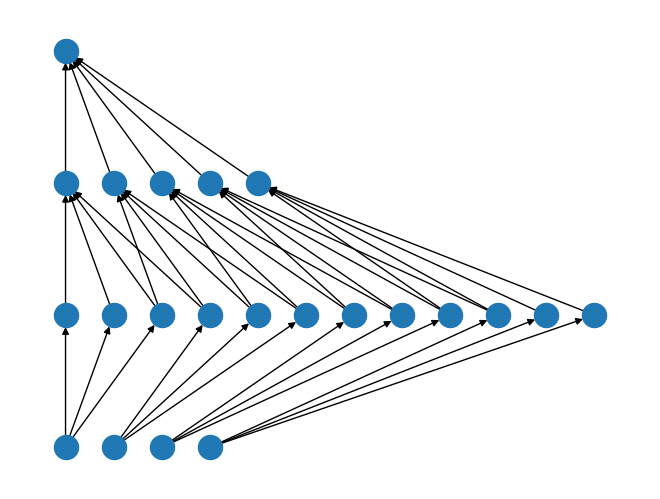

In [ ]:
layers = defaultdict(list)
node_to_layer = {}
node_to_number_in_layer = {}
neural_network = nx.DiGraph(directed=True)

LR = 0.001

for num_column in range(len(x[0])):
  current_iter_input_node = DummyInputNode([num_column])
  neural_network.add_node(current_iter_input_node)
  layers['input'].append(current_iter_input_node)
  node_to_layer[current_iter_input_node] = 0
  node_to_number_in_layer[current_iter_input_node] = num_column

for num_percep in range(12):
  current_iter_node_children = [
      layers['input'][num_percep // 3]
  ]
  current_iter_perceptron = Perceptron(
      np.random.uniform(-1, 1, 1),
      np.random.uniform(-1, 1),
      lr=LR,
  )
  current_iter_perceptron_node = PerceptronNode(
      current_iter_perceptron,
      children=current_iter_node_children,
  )
  neural_network.add_node(current_iter_perceptron_node)
  for child in current_iter_node_children:
    neural_network.add_edge(child, current_iter_perceptron_node)
  layers['hidden1'].append(current_iter_perceptron_node)
  node_to_layer[current_iter_perceptron_node] = 1
  node_to_number_in_layer[current_iter_perceptron_node] = num_percep

for num_percep in range(5):
  current_iter_node_children = [
      layers['hidden1'][num_percep * 2],
      layers['hidden1'][num_percep * 2 + 1],
      layers['hidden1'][num_percep * 2 + 2],
      layers['hidden1'][num_percep * 2 + 3],
  ]
  current_iter_perceptron = Perceptron(
      np.random.uniform(-1, 1, 4),  # последнее число = кол-во деток
      np.random.uniform(-1, 1),
      lr=LR
  )
  current_iter_perceptron_node = PerceptronNode(
      current_iter_perceptron,
      children=current_iter_node_children
  )
  neural_network.add_node(current_iter_perceptron_node)
  for child in current_iter_node_children:
    neural_network.add_edge(child, current_iter_perceptron_node)
  layers['hidden2'].append(current_iter_perceptron_node)
  node_to_layer[current_iter_perceptron_node] = 2
  node_to_number_in_layer[current_iter_perceptron_node] = num_percep


current_iter_perceptron = Perceptron(
    np.random.uniform(-1, 1, 5),
    np.random.uniform(-1, 1),
    activation='none',
    lr=LR,
)
final_node = PerceptronNode(current_iter_perceptron, children=layers['hidden2'])
layers['output'].append(final_node)
neural_network.add_node(final_node)
for child in final_node.children:
  neural_network.add_edge(child, final_node)
node_to_layer[final_node] = 3
node_to_number_in_layer[final_node] = 0

pos = nx.spring_layout(neural_network)
for node in pos:
    level = node_to_layer[node]
    level_n = node_to_number_in_layer[node]
    pos[node] = (level_n * 3, level * 2)
nx.draw(neural_network, pos)

In [ ]:
i = 0

for _ in range(10):  # epoches
  for line_num in range(len(x)):
    x_train, y_train = x[line_num], y[line_num]
    prediction = final_node.forward(np.array(x_train))
    loss = 2 * (prediction - y_train)
    final_node.backward(loss)
    if i % 7777 == 0:
      print(f'Loss: {loss} why {final_node.forward(np.array(x_train)), y_train}')
    i += 1

Loss: -68.08586243697697 why (1.8289159703892162, 35.69302834205096)
Loss: 22.900203120095725 why (24.626337691184318, 13.310795054484839)
Loss: 6.910979426568964 why (21.824159374964196, 18.411081609136204)
Loss: 5.555349247978157 why (39.60609870611986, 36.87904060448929)
Loss: -0.10493360668153429 why (31.835426381068096, 31.88700688957863)
Loss: 2.0645543962078534 why (48.30841832400148, 47.29626821109673)
Loss: 6.233999360255531 why (26.28719146880771, 23.207070902630704)
Loss: -6.553044657634796 why (6.602208022194482, 9.848087312132689)
Loss: -7.431293765658673 why (15.223051014868965, 18.886795799657335)
Loss: 3.089368547203982 why (2.03626302947513, 0.5033652494829042)
Loss: -2.2588213388312255 why (28.29903961996053, 29.40903163581059)
Loss: -6.027043499472676 why (14.183989712744285, 17.164744912494616)
Loss: -1.336978673247316 why (34.72162272569013, 35.37745254570991)


Сетка справилась хорошо, но точно предсказать линейную функцию не смогла. По сравнению с одиночным перцептроном сеть более неустойчива, так как поверхность функции-производной очень сложна.

Применяю сетку к данным о грибах.

По опыту резкие падение кол-ва элементов при перемещении на следующий слой даёт хороший эффект. Возьму последовательность 22 --> 11 --> 5 --> 1 (первый = входной, второй = итог):

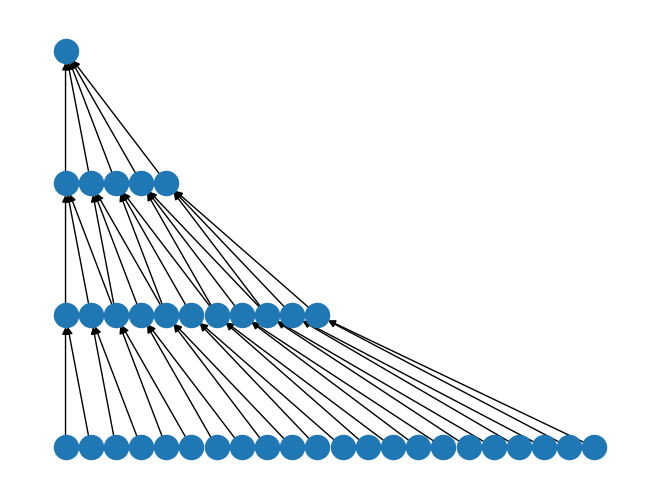

In [ ]:
layers = defaultdict(list)
node_to_layer = {}
node_to_number_in_layer = {}
neural_network = nx.DiGraph(directed=True)

LR = 0.001

for num_column in range(len(trainX.columns)):
  current_iter_input_node = DummyInputNode([num_column])
  neural_network.add_node(current_iter_input_node)
  layers['input'].append(current_iter_input_node)
  node_to_layer[current_iter_input_node] = 0
  node_to_number_in_layer[current_iter_input_node] = num_column

for num_percep in range(11):
  current_iter_node_children = [
      layers['input'][num_percep * 2],
      layers['input'][num_percep * 2 + 1]
  ]
  current_iter_perceptron = Perceptron(
      np.random.uniform(-1, 1, 2),
      np.random.uniform(-1, 1),
      lr=LR,
  )
  current_iter_perceptron_node = PerceptronNode(
      current_iter_perceptron,
      children=current_iter_node_children,
  )
  neural_network.add_node(current_iter_perceptron_node)
  for child in current_iter_node_children:
    neural_network.add_edge(child, current_iter_perceptron_node)
  layers['hidden1'].append(current_iter_perceptron_node)
  node_to_layer[current_iter_perceptron_node] = 1
  node_to_number_in_layer[current_iter_perceptron_node] = num_percep

for num_percep in range(5):
  current_iter_node_children = [
      layers['hidden1'][num_percep * 2],
      layers['hidden1'][num_percep * 2 + 1],
      layers['hidden1'][num_percep * 2 + 2],
  ]
  current_iter_perceptron = Perceptron(
      np.random.uniform(-1, 1, 3),  # последнее число = кол-во деток
      np.random.uniform(-1, 1),
      lr=LR
  )
  current_iter_perceptron_node = PerceptronNode(
      current_iter_perceptron,
      children=current_iter_node_children
  )
  neural_network.add_node(current_iter_perceptron_node)
  for child in current_iter_node_children:
    neural_network.add_edge(child, current_iter_perceptron_node)
  layers['hidden2'].append(current_iter_perceptron_node)
  node_to_layer[current_iter_perceptron_node] = 2
  node_to_number_in_layer[current_iter_perceptron_node] = num_percep


current_iter_perceptron = Perceptron(
    np.random.uniform(-1, 1, 5),
    np.random.uniform(-1, 1),
    activation='none',
    lr=LR,
)
final_node = PerceptronNode(current_iter_perceptron, children=layers['hidden2'])
layers['output'].append(final_node)
neural_network.add_node(final_node)
for child in final_node.children:
  neural_network.add_edge(child, final_node)
node_to_layer[final_node] = 3
node_to_number_in_layer[final_node] = 0

pos = nx.spring_layout(neural_network)
for node in pos:
    level = node_to_layer[node]
    level_n = node_to_number_in_layer[node]
    pos[node] = (level_n * 3, level * 2)
nx.draw(neural_network, pos)

In [ ]:
i = 0

INF = 10 ** 3

for _ in range(10):  # epoches
  for line_num in range(len(trainX)):
    x_train, y_train = trainX.iloc[line_num], trainY.iloc[line_num]
    prediction = final_node.forward(np.array(x_train))
    if y_train == 'p':
      loss = 2 * (prediction - INF)
    else:
      loss = 2 * (prediction + INF)
    final_node.backward(loss)
    if i % 2333 == 0:
      print(f'Loss: {loss} why {prediction, INF if y_train == "p" else (-1) * INF}')
    i += 1

Loss: -2000.0565680731204 why (-0.028284036560202064, 1000)
Loss: -583.8964148223429 why (708.0517925888286, 1000)
Loss: 430.02427151253073 why (-784.9878642437346, -1000)
Loss: -42.165862572167725 why (978.9170687139161, 1000)
Loss: -14.116683735491279 why (992.9416581322544, 1000)
Loss: 200.47387599446802 why (-899.763062002766, -1000)
Loss: 319.46441519043606 why (-840.267792404782, -1000)
Loss: 109.62556292898535 why (1054.8127814644927, 1000)
Loss: 254.1052722210029 why (-872.9473638894985, -1000)
Loss: 319.7546429283857 why (-840.1226785358072, -1000)
Loss: 307.73769705725476 why (-846.1311514713726, -1000)
Loss: -156.25092593537647 why (921.8745370323118, 1000)
Loss: 204.27715876281536 why (-897.8614206185923, -1000)
Loss: 187.80605199782235 why (-906.0969740010888, -1000)
Loss: -6.3460188009307785 why (996.8269905995346, 1000)
Loss: 3.2084039507371926 why (1001.6042019753686, 1000)
Loss: 29.975273451835164 why (1014.9876367259176, 1000)
Loss: 310.42320703755195 why (-844.788396

In [ ]:
predictions = []
confidences = []

for lineX in testX.iterrows():
  prediction = final_node.forward(lineX[1].values)
  if prediction > 0:
    predictions.append('p')
    if prediction >= 1000:
      pp = 1
    else:
      pp = prediction / 1000
    confidences.append({'p': pp, 'e': 1 - pp, })
  else:
    predictions.append('e')
    if prediction <= -1000:
      ep = 1
    else:
      ep = (-1) * prediction / 1000
    confidences.append({'e': ep, 'p': 1 - ep, })


print(classification_report(predictions, testY))

              precision    recall  f1-score   support

           e       1.00      0.91      0.95      1640
           p       0.89      1.00      0.94      1204

    accuracy                           0.95      2844
   macro avg       0.94      0.95      0.95      2844
weighted avg       0.95      0.95      0.95      2844



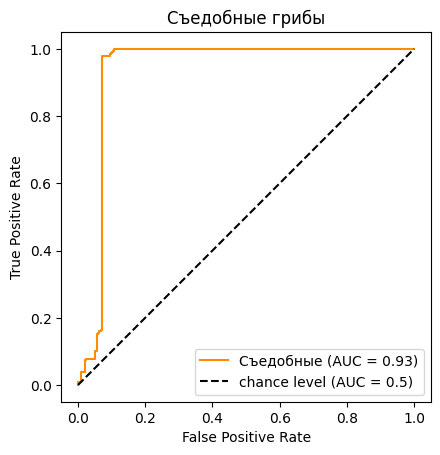

In [ ]:
RocCurveDisplay.from_predictions(
      [cl == 'e' for cl in testY],
      [proba_line['e'] for proba_line in confidences],
      name="Съедобные",
      color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Съедобные грибы")
plt.legend()
plt.show()